In [1]:
import torch
from torch import nn

import dgl

import cloudpickle

import matplotlib.pyplot as plt
from ipywidgets import interact

import numpy as np
import os

In [2]:
plt.rcParams['figure.figsize'] = [5,4]
plt.rcParams['font.size'] = 16
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['lines.markersize'] = 3
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['font.family'] = 'sans-serif'#'Times New Roman'
#plt.rcParams['font.sans-serif'] = ['Arial'] #['Times New Roman'] #
plt.rcParams['text.usetex'] = False
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams["axes.formatter.use_mathtext"] = True

In [3]:
d = '20240409112547' #'20240423183430' # 

learning_dir = 'mcmNonParamODE2Dsym_'+d
simulation_dir = 'mcmSimulate_'+d

device = 'cuda:2'

torch.Size([187335, 3])
torch.Size([187335, 3])
epoch:  12489


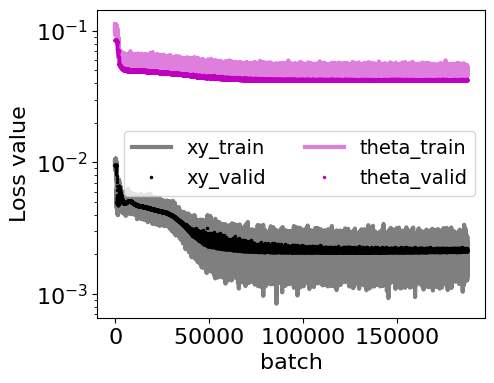

In [4]:
train_loss = torch.load(os.path.join(learning_dir, 'Mcm_nonParametric2Dsym_loss_history.pt'))
valid_loss = torch.load(os.path.join(learning_dir, 'Mcm_nonParametric2Dsym_validloss_history.pt'))
print(train_loss.shape)
print(valid_loss.shape)

loss_colors = ['k', 'm']#, 'g']
loss_names = ['xy', 'theta']#, 'edge']

fig, ax = plt.subplots()
for i, c in enumerate(zip(loss_colors, loss_names)):
    ax.semilogy(train_loss[:,i], c[0]+'-', label=c[1]+'_train', alpha=0.5)
    ax.semilogy(valid_loss[:,i], c[0]+'.', label=c[1]+'_valid')
ax.legend(ncols=2, fontsize=14)

ax.set_xlabel('batch')#'epoch')
ax.set_ylabel('Loss value')

print('epoch: ', torch.isfinite(valid_loss[:,0]).sum().item())

fig.savefig(os.path.join(learning_dir, 'loss_history.svg'))
fig.savefig(os.path.join(learning_dir, 'loss_history.png'))

In [5]:
print('train', train_loss)
print('valid', valid_loss)

train tensor([[0.0094, 0.1016,    nan],
        [0.0097, 0.1066,    nan],
        [0.0093, 0.1013,    nan],
        ...,
        [0.0017, 0.0496,    nan],
        [0.0019, 0.0460,    nan],
        [0.0025, 0.0489,    nan]])
valid tensor([[   nan,    nan,    nan],
        [   nan,    nan,    nan],
        [   nan,    nan,    nan],
        ...,
        [   nan,    nan,    nan],
        [   nan,    nan,    nan],
        [0.0022, 0.0427,    nan]])


In [6]:
with open(os.path.join(simulation_dir, 'Mcm_SDE_model.pt'), mode='rb') as f:
    simulation_model = cloudpickle.load(f)
print(simulation_model)

print(simulation_model.state_dict())

dynamicGSDEwrapper(
  (dynamicGNDEmodule): dynamicGNDEmodule(
    (calc_module): interactionModule(
      (J_chem): J_chemoattractant2D(
        (k1): torch_kn_cutoff(
          (cutoff_module): ReLU()
        )
      )
      (J_CF): J_contactFollowing()
      (J_CIL): J_contactInhibitionOfLocomotion()
      (A_CFs_module): Embedding(2, 1)
      (A_chems_module): Embedding(2, 1)
      (distanceCalc): euclidDistance_periodic()
    )
    (edgeRefresher): edgeRefresh(
      (edgeConditionModule): radiusgraphEdge(
        (scoreCalcModule): distanceSigmoid()
        (distanceCalc): euclidDistance_periodic()
        (distance2edge): distance2edge_batched()
      )
      (scorePostProcessModule): pAndLogit2KLdiv()
      (scoreIntegrationModule): scoreListModule()
    )
  )
  (ndataInOutModule): multiVariableNdataInOut()
  (derivativeInOutModule): multiVariableNdataInOut()
  (noiseInOutModule): singleVariableNdataInOut()
)
OrderedDict([('dynamicGNDEmodule.calc_module.sigma', tensor(0.4472)), 

In [7]:
with open(os.path.join(learning_dir, 'Mcm_nonParametric2Dsym_learned_model.pt'), mode='rb') as f:
    learned_model = cloudpickle.load(f)
print(learned_model)

print(learned_model.state_dict())

dynamicGSDEwrapper(
  (dynamicGNDEmodule): dynamicGNDEmodule(
    (calc_module): interactionModule_nonParametric_2Dsym(
      (J_chem): J_chemoattractant2D(
        (k1): torch_kn_cutoff(
          (cutoff_module): ReLU()
        )
      )
      (J_CF): J_contactFollowing()
      (J_CIL): J_contactInhibitionOfLocomotion()
      (A_CFs_module): Embedding(2, 1)
      (A_chems_module): Embedding(2, 1)
      (distanceCalc): euclidDistance_periodic()
      (embedding): ModuleList(
        (0): Embedding(2, 2)
        (1): Embedding(2, 2)
        (2): Embedding(2, 2)
        (3): Embedding(2, 2)
      )
      (fNN): Sequential(
        (Linear0): Linear(in_features=7, out_features=128, bias=True)
        (ELU0): ELU(alpha=1.0)
        (Linear1): Linear(in_features=128, out_features=128, bias=True)
        (ELU1): ELU(alpha=1.0)
        (Linear2): Linear(in_features=128, out_features=128, bias=True)
        (ELU2): ELU(alpha=1.0)
        (Linear3): Linear(in_features=128, out_features=2, bias

In [8]:
L = 10

In [9]:
xct = torch.load(os.path.join(simulation_dir, 'Mcm_SDE_traj_celltype.pt'))
x = xct['xtheta']
ct = xct['celltype']
print(x)
print(ct)

tensor([[[[3.0585e+00, 3.4262e-01, 5.3549e+00],
          [9.3042e+00, 8.7918e-01, 2.1047e+00],
          [9.6093e+00, 8.2095e+00, 2.0635e+00],
          ...,
          [1.4772e+01, 2.2242e+00, 8.3382e-01],
          [1.4768e+01, 7.9008e+00, 3.0794e-01],
          [8.7467e+00, 5.5020e+00, 2.9719e+00]],

         [[5.8929e+00, 1.1387e+01, 2.0720e+00],
          [1.2909e+01, 1.1593e+01, 2.7037e-01],
          [3.7140e+00, 9.0988e+00, 5.7998e+00],
          ...,
          [1.0554e+01, 1.2607e+01, 4.9102e+00],
          [1.5365e+01, 1.0465e+01, 5.5820e+00],
          [1.2190e+01, 1.7404e+01, 1.8122e+00]],

         [[1.7098e+01, 1.5488e+01, 4.2294e+00],
          [1.1833e+00, 1.9282e+01, 1.3804e+00],
          [8.8611e+00, 1.8732e+01, 4.6700e+00],
          ...,
          [1.0192e+01, 8.3598e+00, 5.2721e+00],
          [1.2904e+01, 1.4790e+01, 2.3913e+00],
          [1.9344e+01, 1.3133e+01, 4.8915e-01]],

         [[1.0726e+00, 1.9819e+01, 2.2818e+00],
          [1.2642e+01, 9.9887e+00, 3.

In [10]:
print(x.shape)

torch.Size([301, 6, 400, 3])


In [11]:
j=0
distance_xy = torch.norm(torch.stack([simulation_model.to(device).dynamicGNDEmodule.edgeRefresher.edgeConditionModule.distanceCalc(torch.unsqueeze(x[i,j,:,:2].to(device), dim=0), torch.unsqueeze(x[i,j,:,:2].to(device), dim=1)) for i in range(x.shape[0])], dim=0),dim=-1)
distance_xy.shape

torch.Size([301, 400, 400])

In [12]:
histbins = torch.linspace(0,1,21)

In [13]:
hist, binedges = torch.histogram(distance_xy.detach().cpu().flatten(), histbins)
hist[0] = hist[0] - x.shape[0]*x.shape[2]
print(hist, binedges)

tensor([4.0000e+01, 3.1400e+02, 5.1200e+02, 9.7000e+02, 1.8420e+03, 3.4480e+03,
        6.4840e+03, 1.1978e+04, 2.5142e+04, 5.1173e+04, 7.3091e+04, 8.0638e+04,
        8.0930e+04, 7.8292e+04, 7.4298e+04, 7.3532e+04, 7.5735e+04, 8.1361e+04,
        8.9336e+04, 9.4102e+04]) tensor([0.0000, 0.0500, 0.1000, 0.1500, 0.2000, 0.2500, 0.3000, 0.3500, 0.4000,
        0.4500, 0.5000, 0.5500, 0.6000, 0.6500, 0.7000, 0.7500, 0.8000, 0.8500,
        0.9000, 0.9500, 1.0000])


In [14]:
for j in range(1, x.shape[1]):
    distance_xy = torch.norm(torch.stack([simulation_model.to(device).dynamicGNDEmodule.edgeRefresher.edgeConditionModule.distanceCalc(torch.unsqueeze(x[i,j,:,:2].to(device), dim=0), torch.unsqueeze(x[i,j,:,:2].to(device), dim=1)) for i in range(x.shape[0])], dim=0),dim=-1)
    hist_tmp, _ = torch.histogram(distance_xy.detach().cpu().flatten(), histbins)
    hist_tmp[0] = hist_tmp[0] - x.shape[0]*x.shape[2]
    hist = hist + hist_tmp
print(hist)

tensor([3.4600e+02, 1.6330e+03, 2.8350e+03, 5.2440e+03, 9.3960e+03, 1.7842e+04,
        3.4786e+04, 6.6048e+04, 1.4595e+05, 3.1009e+05, 4.3955e+05, 4.8066e+05,
        4.7878e+05, 4.6180e+05, 4.4129e+05, 4.3667e+05, 4.4742e+05, 4.8554e+05,
        5.3247e+05, 5.5835e+05])


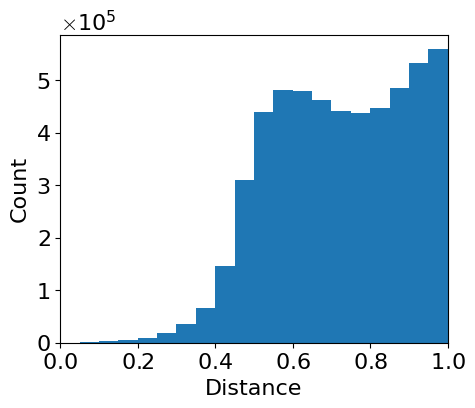

In [15]:
fig, ax = plt.subplots()
ax.bar((binedges[1:]+binedges[:-1])/2, hist, width=binedges[1])#, cumulative=True, density=True)
ax.set_xlim([0,1])
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xlabel('Distance')
ax.set_ylabel('Count')
fig.savefig(os.path.join(learning_dir, 'data_distance_hist.svg'))
fig.savefig(os.path.join(learning_dir, 'data_distance_hist.png'))

In [16]:
ts = torch.load(os.path.join(simulation_dir, 'Mcm_SDE_t_eval.pt'))
print(ts)

tensor([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
         12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,
         24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,  35.,
         36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,  46.,  47.,
         48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.,
         60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,  70.,  71.,
         72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.,  81.,  82.,  83.,
         84.,  85.,  86.,  87.,  88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,
         96.,  97.,  98.,  99., 100., 101., 102., 103., 104., 105., 106., 107.,
        108., 109., 110., 111., 112., 113., 114., 115., 116., 117., 118., 119.,
        120., 121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
        132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142., 143.,
        144., 145., 146., 147., 148., 14

In [17]:
t_min = ts.min()
t_max = ts.max()

In [18]:
N_batch = x.shape[1]
N_t = x.shape[0]

In [19]:
def plot_particles(n, t, flg_track=False):
    fig, ax = plt.subplots()
    
    ax.plot(x[t, n, ct[n]==0, 0], x[t, n, ct[n]==0, 1], 'k.')
    ax.plot(x[t, n, ct[n]==1, 0], x[t, n, ct[n]==1, 1], 'r.')
    ax.quiver(x[t, n, :, 0], x[t, n, :, 1], torch.cos(x[t, n, :, 2]), torch.sin(x[t, n, :, 2]))
    ax.grid(True)
    ax.set_aspect('equal')
    xy_mean = torch.mean(x[t, n, :, 0:2], dim=0)
    if flg_track:
        ax.set_xlim([xy_mean[0]-L/2, xy_mean[0]+L/2])
        ax.set_ylim([xy_mean[1]-L/2, xy_mean[1]+L/2])
    else:
        ax.set_xlim([0, L])
        ax.set_ylim([0, L])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('t = {:.1f}'.format(ts[t]))
    return fig, ax

In [20]:
@interact(n=(0, N_batch-1), t = (0, N_t-1))
def f(n, t):
    fig, ax = plot_particles(n,t)

interactive(children=(IntSlider(value=2, description='n', max=5), IntSlider(value=150, description='t', max=30…

In [21]:
def biGraph(xy, theta, ct):
    g = dgl.graph((torch.tensor([], dtype=int), torch.tensor([], dtype=int)), num_nodes=2).to(device)
    g.ndata['x'] = torch.stack((torch.zeros_like(xy), xy), dim=0).to(device)
    g.ndata['theta'] = torch.stack((torch.zeros_like(theta), theta), dim=0).to(device)
    g.ndata['celltype'] = ct.to(int).to(device)
    return g

In [22]:
x_lim = 1.

N_full = 10

test_x = torch.linspace(-x_lim, x_lim, N_full)
test_theta = torch.linspace(0, 2*np.pi,  N_full)
test_ct = torch.tensor([0., 1.])
test_xythct = torch.cartesian_prod(test_x, test_x, test_theta, test_ct, test_ct)

test_graph_true = dgl.batch(list(map(biGraph, test_xythct[..., :2], test_xythct[..., 2:3], test_xythct[..., 3:])))
test_graph_pred = dgl.batch(list(map(biGraph, test_xythct[..., :2], test_xythct[..., 2:3], test_xythct[..., 3:])))


simulation_model.deleteGraph()
simulation_model.dynamicGNDEmodule.edgeRefresher.edgeConditionModule(test_graph_pred)
simulation_model.to(device)
learned_model.deleteGraph()
learned_model.dynamicGNDEmodule.edgeRefresher.edgeConditionModule(test_graph_pred)
learned_model.to(device)

test_graph_true = simulation_model.dynamicGNDEmodule.edgeRefresher.createEdge(test_graph_true).to(device)
test_graph_pred = learned_model.dynamicGNDEmodule.edgeRefresher.createEdge(test_graph_pred).to(device)


In [23]:
print(test_graph_true.ndata)

{'x': tensor([[ 0.,  0.],
        [-1., -1.],
        [ 0.,  0.],
        ...,
        [ 1.,  1.],
        [ 0.,  0.],
        [ 1.,  1.]], device='cuda:2'), 'theta': tensor([[0.0000],
        [0.0000],
        [0.0000],
        ...,
        [6.2832],
        [0.0000],
        [6.2832]], device='cuda:2'), 'celltype': tensor([0, 0, 0,  ..., 0, 1, 1], device='cuda:2')}


In [24]:
print(simulation_model.state_dict())

OrderedDict([('dynamicGNDEmodule.calc_module.sigma', tensor(0.4472, device='cuda:2')), ('dynamicGNDEmodule.calc_module.u0', tensor(1., device='cuda:2')), ('dynamicGNDEmodule.calc_module.beta', tensor(1., device='cuda:2')), ('dynamicGNDEmodule.calc_module.A_CIL', tensor(0., device='cuda:2')), ('dynamicGNDEmodule.calc_module.A_ext', tensor(0., device='cuda:2')), ('dynamicGNDEmodule.calc_module.J_chem.kappa', tensor(0.5000, device='cuda:2')), ('dynamicGNDEmodule.calc_module.J_CIL.r', tensor(1., device='cuda:2')), ('dynamicGNDEmodule.calc_module.A_CFs_module.weight', tensor([[0.9000],
        [0.9000]], device='cuda:2')), ('dynamicGNDEmodule.calc_module.A_chems_module.weight', tensor([[0.5000],
        [0.5000]], device='cuda:2'))])


In [25]:
test_graph_true.update_all(simulation_model.dynamicGNDEmodule.calc_module.calc_message, simulation_model.dynamicGNDEmodule.calc_module.aggregate_message)
test_graph_pred.update_all(learned_model.dynamicGNDEmodule.calc_module.calc_message, learned_model.dynamicGNDEmodule.calc_module.aggregate_message)

In [26]:
test_graph_true.ndata['p'] = simulation_model.dynamicGNDEmodule.calc_module.polarity2vector(test_graph_true.ndata['theta'])
test_graph_true.ndata['v3'] = simulation_model.dynamicGNDEmodule.calc_module.u0 * test_graph_true.ndata['p']
test_graph_true.ndata['w4'] = simulation_model.dynamicGNDEmodule.calc_module.A_ext * test_graph_true.ndata['p'][..., :1]

In [27]:
test_graph_pred.ndata['p'] = learned_model.dynamicGNDEmodule.calc_module.polarity2vector(test_graph_pred.ndata['theta'])
test_graph_pred.ndata['theta_mod'] = torch.remainder(test_graph_pred.ndata['theta'], 2*np.pi)
test_graph_pred.ndata['emb3'] = learned_model.dynamicGNDEmodule.calc_module.embedding[learned_model.dynamicGNDEmodule.calc_module.i_embeddings['f3NN']](test_graph_pred.ndata['celltype'])
test_graph_pred.ndata['emb4'] = learned_model.dynamicGNDEmodule.calc_module.embedding[learned_model.dynamicGNDEmodule.calc_module.i_embeddings['f4NN']](test_graph_pred.ndata['celltype'])

test_graph_pred.ndata['v3'] = learned_model.dynamicGNDEmodule.calc_module.rot_tensor(learned_model.dynamicGNDEmodule.calc_module.f3NN(test_graph_pred.ndata['emb3']), test_graph_pred.ndata['theta_mod'])
test_graph_pred.ndata['w4'] = learned_model.dynamicGNDEmodule.calc_module.f4NN(test_graph_pred.ndata['emb4'])

In [28]:
print(test_graph_true.ndata)

{'x': tensor([[ 0.,  0.],
        [-1., -1.],
        [ 0.,  0.],
        ...,
        [ 1.,  1.],
        [ 0.,  0.],
        [ 1.,  1.]], device='cuda:2'), 'theta': tensor([[0.0000],
        [0.0000],
        [0.0000],
        ...,
        [6.2832],
        [0.0000],
        [6.2832]], device='cuda:2'), 'celltype': tensor([0, 0, 0,  ..., 0, 1, 1], device='cuda:2'), 'v': tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        ...,
        [0., 0.],
        [0., 0.],
        [0., 0.]], device='cuda:2', grad_fn=<IndexCopyBackward0>), 'w': tensor([[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]], device='cuda:2', grad_fn=<IndexCopyBackward0>), 'p': tensor([[1.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00],
        ...,
        [1.0000e+00, 1.7485e-07],
        [1.0000e+00, 0.0000e+00],
        [1.0000e+00, 1.7485e-07]], device='cuda:2'), 'v3': tensor([[1.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.

In [29]:
print(test_graph_pred.ndata)

{'x': tensor([[ 0.,  0.],
        [-1., -1.],
        [ 0.,  0.],
        ...,
        [ 1.,  1.],
        [ 0.,  0.],
        [ 1.,  1.]], device='cuda:2'), 'theta': tensor([[0.0000],
        [0.0000],
        [0.0000],
        ...,
        [6.2832],
        [0.0000],
        [6.2832]], device='cuda:2'), 'celltype': tensor([0, 0, 0,  ..., 0, 1, 1], device='cuda:2'), 'v': tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        ...,
        [0., 0.],
        [0., 0.],
        [0., 0.]], device='cuda:2', grad_fn=<IndexCopyBackward0>), 'w': tensor([[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]], device='cuda:2', grad_fn=<IndexCopyBackward0>), 'p': tensor([[1.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00],
        ...,
        [1.0000e+00, 1.7485e-07],
        [1.0000e+00, 0.0000e+00],
        [1.0000e+00, 1.7485e-07]], device='cuda:2'), 'theta_mod': tensor([[0.],
        [0.],
        [0.],
        

In [30]:
test_graph_true.ndata['v'].shape

torch.Size([8000, 2])

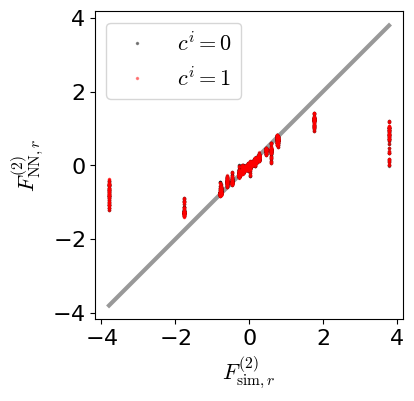

In [31]:
fig, ax = plt.subplots()
ax.plot(np.array([-1, 1])*test_graph_true.ndata['v'][0::2].max().item(), np.array([-1, 1])*test_graph_true.ndata['v'][0::2].max().item(), 'k-', label='', alpha=0.4)
#p0x=ax.plot(test_graph_true.ndata['v'][0::2][test_graph_true.ndata['celltype'][0::2]==0][:, 0].detach().cpu().numpy().flatten(), test_graph_pred.ndata['v'][0::2][test_graph_pred.ndata['celltype'][0::2]==0][:, 0].detach().cpu().numpy().flatten(), 'k^', alpha=0.4, label=r'$F^{(2)}_x,~c^i=0$')
#p1x=ax.plot(test_graph_true.ndata['v'][0::2][test_graph_true.ndata['celltype'][0::2]==1][:, 0].detach().cpu().numpy().flatten(), test_graph_pred.ndata['v'][0::2][test_graph_pred.ndata['celltype'][0::2]==1][:, 0].detach().cpu().numpy().flatten(), 'r^', alpha=0.4, label=r'$F^{(2)}_x,~c^i=1$')
#p0y=ax.plot(test_graph_true.ndata['v'][0::2][test_graph_true.ndata['celltype'][0::2]==0][:, 1].detach().cpu().numpy().flatten(), test_graph_pred.ndata['v'][0::2][test_graph_pred.ndata['celltype'][0::2]==0][:, 1].detach().cpu().numpy().flatten(), 'k.', alpha=0.4, label=r'$F^{(2)}_y,~c^i=0$')
#p1y=ax.plot(test_graph_true.ndata['v'][0::2][test_graph_true.ndata['celltype'][0::2]==1][:, 1].detach().cpu().numpy().flatten(), test_graph_pred.ndata['v'][0::2][test_graph_pred.ndata['celltype'][0::2]==1][:, 1].detach().cpu().numpy().flatten(), 'r.', alpha=0.4, label=r'$F^{(2)}_y,~c^i=1$')
p0=ax.plot(test_graph_true.ndata['v'][0::2][test_graph_true.ndata['celltype'][0::2]==0].detach().cpu().numpy().flatten(), test_graph_pred.ndata['v'][0::2][test_graph_pred.ndata['celltype'][0::2]==0].detach().cpu().numpy().flatten(), 'k.', alpha=0.4, label=r'$c^i=0$', rasterized=True)
p1=ax.plot(test_graph_true.ndata['v'][0::2][test_graph_true.ndata['celltype'][0::2]==1].detach().cpu().numpy().flatten(), test_graph_pred.ndata['v'][0::2][test_graph_pred.ndata['celltype'][0::2]==1].detach().cpu().numpy().flatten(), 'r.', alpha=0.4, label=r'$c^i=1$', rasterized=True)
ax.set_aspect('equal', adjustable='box')
ax.set_xlabel(r'$F^{(2)}_{{\rm sim}, r}$')
ax.set_ylabel(r'$F^{(2)}_{{\rm NN}, r}$')
ax.set_xticks([-4,-2,0,2,4])
ax.set_yticks([-4,-2,0,2,4])
#ax.legend([p0x, p1x, p0y, p1y], [r'$F^{(2)}_x,~c^i=0$', r'$F^{(2)}_x,~c^i=1$', r'$F^{(2)}_y,~c^i=0$', r'$F^{(2)}_y,~c^i=1$'], ncol=2)
ax.legend()#handles=[p0, p1])
fig.savefig(os.path.join(learning_dir, 'interaction_force_predVStrue.svg'), dpi=600)
fig.savefig(os.path.join(learning_dir, 'interaction_force_predVStrue.png'))

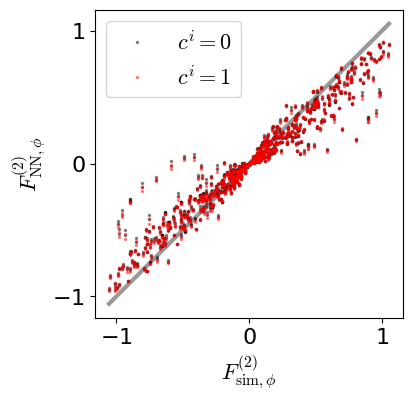

In [32]:
fig, ax = plt.subplots()
ax.plot(np.array([-1, 1])*test_graph_true.ndata['w'][0::2].max().item(), np.array([-1, 1])*test_graph_true.ndata['w'][0::2].max().item(), 'k-', label='', alpha=0.4)
ax.plot(test_graph_true.ndata['w'][0::2][test_graph_true.ndata['celltype'][0::2]==0].detach().cpu().numpy(), test_graph_pred.ndata['w'][0::2][test_graph_pred.ndata['celltype'][0::2]==0].detach().cpu().numpy(), 'k.', alpha=0.4, label=r'$c^i=0$', rasterized=True)
ax.plot(test_graph_true.ndata['w'][0::2][test_graph_true.ndata['celltype'][0::2]==1].detach().cpu().numpy(), test_graph_pred.ndata['w'][0::2][test_graph_pred.ndata['celltype'][0::2]==1].detach().cpu().numpy(), 'r.', alpha=0.4, label=r'$c^i=1$', rasterized=True)
ax.set_aspect('equal', adjustable='box')
ax.set_xlabel(r'$F^{(2)}_{{\rm sim}, \phi}$')
ax.set_ylabel(r'$F^{(2)}_{{\rm NN}, \phi}$')
ax.set_xticks([-1,0,1])
ax.set_yticks([-1,0,1])
#ax.legend([p0x, p1x, p0y, p1y], [r'$F^{(2)}_x,~c^i=0$', r'$F^{(2)}_x,~c^i=1$', r'$F^{(2)}_y,~c^i=0$', r'$F^{(2)}_y,~c^i=1$'], ncol=2)
ax.legend()#handles=[p0, p1])
fig.savefig(os.path.join(learning_dir, 'interaction_torque_predVStrue.svg'), dpi=600)
fig.savefig(os.path.join(learning_dir, 'interaction_torque_predVStrue.png'))

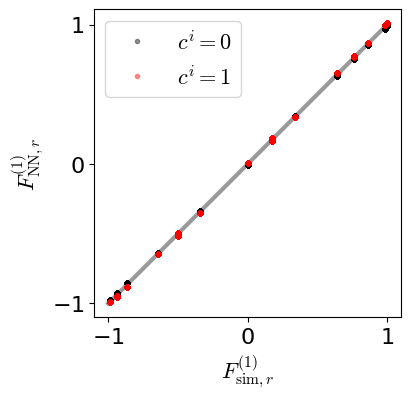

In [33]:
fig, ax = plt.subplots()
ax.plot(np.array([-1, 1])*test_graph_true.ndata['v3'][1::2].max().item(), np.array([-1, 1])*test_graph_true.ndata['v3'][1::2].max().item(), 'k-', alpha=0.4, label='')
p0=ax.plot(test_graph_true.ndata['v3'][1::2][test_graph_true.ndata['celltype'][1::2]==0].detach().cpu().numpy().flatten(), test_graph_pred.ndata['v3'][1::2][test_graph_pred.ndata['celltype'][1::2]==0].detach().cpu().numpy().flatten(), 'k.', markersize=6, alpha=0.4, label=r'$c^i=0$', rasterized=True)
p1=ax.plot(test_graph_true.ndata['v3'][1::2][test_graph_true.ndata['celltype'][1::2]==1].detach().cpu().numpy().flatten(), test_graph_pred.ndata['v3'][1::2][test_graph_pred.ndata['celltype'][1::2]==1].detach().cpu().numpy().flatten(), 'r.', markersize=6, alpha=0.4, label=r'$c^i=1$', rasterized=True)
ax.set_aspect('equal', adjustable='box')
ax.set_xlabel(r'$F^{(1)}_{{\rm sim}, r}$')
ax.set_ylabel(r'$F^{(1)}_{{\rm NN}, r}$')
ax.set_xticks([-1,0,1])
ax.set_yticks([-1,0,1])
ax.legend()
fig.savefig(os.path.join(learning_dir, 'self_force_predVStrue.svg'), dpi=600)
fig.savefig(os.path.join(learning_dir, 'self_force_predVStrue.png'))

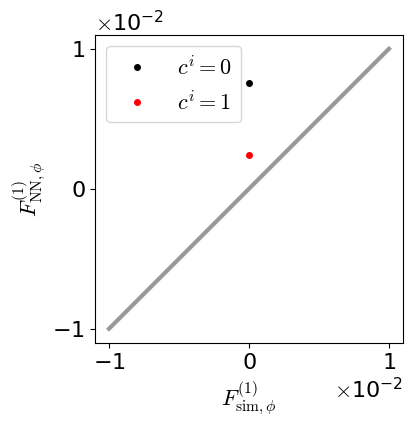

In [34]:
w4range = 0.01
fig, ax = plt.subplots()
ax.plot(np.array([-1, 1])*w4range, np.array([-1, 1])*w4range, 'k-', label='', alpha=0.4)
#ax.plot(test_graph_true.ndata['w4'][1::2].detach().cpu().numpy(), test_graph_pred.ndata['w4'][1::2].detach().cpu().numpy(), 'r.', alpha=0.2)
p0=ax.plot(test_graph_true.ndata['w4'][1::2][test_graph_true.ndata['celltype'][1::2]==0].detach().cpu().numpy().flatten()[0], test_graph_pred.ndata['w4'][1::2][test_graph_pred.ndata['celltype'][1::2]==0].detach().cpu().numpy().flatten()[0], 'k.', markersize=8, alpha=1, label=r'$c^i=0$')#, rasterized=True)
p1=ax.plot(test_graph_true.ndata['w4'][1::2][test_graph_true.ndata['celltype'][1::2]==1].detach().cpu().numpy().flatten()[0], test_graph_pred.ndata['w4'][1::2][test_graph_pred.ndata['celltype'][1::2]==1].detach().cpu().numpy().flatten()[0], 'r.', markersize=8, alpha=1, label=r'$c^i=1$')#, rasterized=True)
ax.set_aspect('equal', adjustable='box')
ax.set_xlabel(r'$F^{(1)}_{{\rm sim}, \phi}$')
ax.set_ylabel(r'$F^{(1)}_{{\rm NN}, \phi}$')
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks([-1e-2,0,1e-2])
ax.set_yticks([-1e-2,0,1e-2])
ax.legend()
fig.savefig(os.path.join(learning_dir, 'self_torque_predVStrue.svg'), dpi=600)
fig.savefig(os.path.join(learning_dir, 'self_torque_predVStrue.png'))

In [35]:
test_xy_2D = test_graph_true.ndata['x'][1::2].detach().reshape(N_full, N_full, N_full, 2,2, 2)
test_polarity_2D = test_graph_true.ndata['p'][1::2].detach().reshape(N_full, N_full, N_full, 2,2, 2)
test_theta = test_graph_true.ndata['theta'][1::2].detach().reshape(N_full, N_full, N_full, 2,2, 1)

true_force = test_graph_true.ndata['v'][0::2].detach().reshape(N_full, N_full, N_full, 2,2, 2)

pred_force = test_graph_pred.ndata['v'][0::2].detach().reshape(N_full, N_full, N_full, 2,2, 2)


true_torque = test_graph_true.ndata['w'][0::2].detach().reshape(N_full, N_full, N_full, 2,2, 1)

pred_torque = test_graph_pred.ndata['w'][0::2].detach().reshape(N_full, N_full, N_full, 2,2, 1)


true_f3 = test_graph_true.ndata['v3'][1::2].detach().reshape(N_full, N_full, N_full, 2,2, 2)

pred_f3 = test_graph_pred.ndata['v3'][1::2].detach().reshape(N_full, N_full, N_full, 2,2, 2)


true_f4 = test_graph_true.ndata['w4'][1::2].detach().reshape(N_full, N_full, N_full, 2,2, 1)

pred_f4 = test_graph_pred.ndata['w4'][1::2].detach().reshape(N_full, N_full, N_full, 2,2, 1)


In [36]:
test_unitVec = torch.nn.functional.normalize(test_xy_2D, dim=-1)
test_distance = torch.norm(test_xy_2D, dim=-1)

def xy2radialRotational(xy, uv):
    radial = xy[..., 0] * uv[..., 0] + xy[..., 1] * uv[..., 1]
    rotational = xy[..., 1] * uv[..., 0] - xy[..., 0] * uv[..., 1]
    return radial, rotational

In [37]:
true_RR = xy2radialRotational(true_force, test_unitVec)
pred_RR = xy2radialRotational(pred_force, test_unitVec)

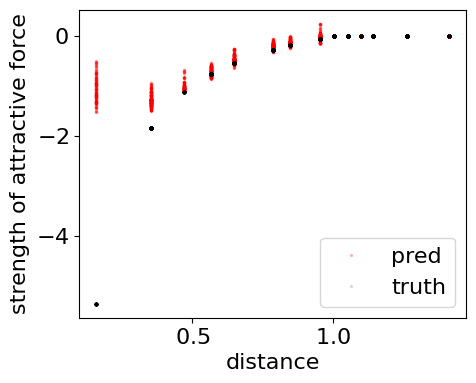

In [38]:
fig, ax = plt.subplots()
ax.plot(test_distance.reshape(-1).cpu(), pred_RR[0].reshape(-1).cpu(), 'r.', alpha=0.2, label='pred')
ax.plot(test_distance.reshape(-1).cpu(), true_RR[0].reshape(-1).cpu(), 'k.', alpha=0.1, label='truth')
ax.legend()
ax.set_xlabel('distance')
ax.set_ylabel('strength of attractive force')

fig.savefig(os.path.join(learning_dir, 'distance_force.svg'))
fig.savefig(os.path.join(learning_dir, 'distance_force.png'))

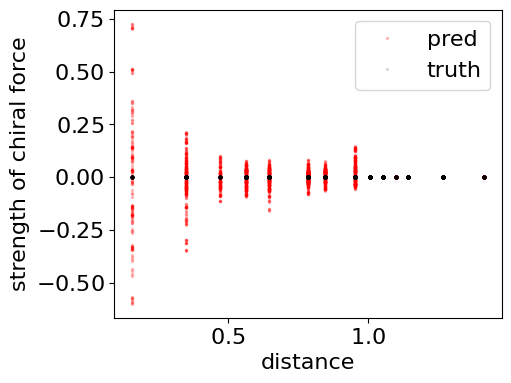

In [39]:
fig, ax = plt.subplots()
ax.plot(test_distance.reshape(-1).cpu(), pred_RR[1].reshape(-1).cpu(), 'r.', alpha=0.2, label='pred')
ax.plot(test_distance.reshape(-1).cpu(), true_RR[1].reshape(-1).cpu(), 'k.', alpha=0.1, label='truth')
ax.legend()
ax.set_xlabel('distance')
ax.set_ylabel('strength of chiral force')

fig.savefig(os.path.join(learning_dir, 'distance_force_chiral.svg'))
fig.savefig(os.path.join(learning_dir, 'distance_force_chiral.png'))

In [40]:
def forceColorMap(f, clabel, xy=test_xy_2D[:,:,0,0,0,:].cpu(), vmin=None, vmax=None):
    fig, ax = plt.subplots()
    c = ax.pcolor(xy[...,0], xy[...,1], f, vmin=vmin, vmax=vmax)
    fig.colorbar(c, ax=ax, label=clabel)
    ax.set_xlabel('relative x of neighbor')
    ax.set_ylabel('relative y of neighbor')
    ax.set_aspect('equal', adjustable='box')
    return fig, ax

In [41]:
def plot_f2NNvals_2D(i_theta, i_i, i_j):
    
    v_lim = 0.8

    figax_p = forceColorMap(pred_torque[:,:,i_theta, i_i, i_j,0].cpu(), 'Pred interaction torque', vmin=-v_lim, vmax=v_lim)
    figax_p[0].suptitle('r$\theta={:d}\pi/{:d}, n_i={:d}, n_j={:d}$'.format(i_theta, len(test_theta), i_i, i_j))
    
    figax_t = forceColorMap(true_torque[:,:,i_theta, i_i, i_j,0].cpu(), 'True interaction torque', vmin=-v_lim, vmax=v_lim)
    figax_t[0].suptitle('r$\theta={:d}\pi/{:d}, n_i={:d}, n_j={:d}$'.format(i_theta, len(test_theta), i_i, i_j))
    
    return figax_p, figax_t

In [42]:
@interact(i_theta=(0, N_full-1), i_i = (0, 1), i_j = (0, 1))
def f(i_theta, i_i, i_j):
    figaxs = plot_f2NNvals_2D(i_theta, i_i, i_j)

interactive(children=(IntSlider(value=4, description='i_theta', max=9), IntSlider(value=0, description='i_i', …

In [43]:
for i_theta in range(len(test_theta)):
    for i_i in range(len(test_ct)):
        for i_j in range(len(test_ct)):
            figaxs = plot_f2NNvals_2D(i_theta, i_i, i_j)

            figaxs[0][0].savefig(os.path.join(learning_dir, 'interaction_torque_2D_pred_theta{:d}of{:d}_{:d}_{:d}.png'.format(i_theta, len(test_theta), i_i, i_j)))
            figaxs[0][0].clf()
            plt.close()
            
            figaxs[1][0].savefig(os.path.join(learning_dir, 'interaction_torque_2D_true_theta{:d}of{:d}_{:d}_{:d}.png'.format(i_theta, len(test_theta), i_i, i_j)))
            figaxs[1][0].clf()
            plt.close()

In [44]:
def plot_f2NNvals(i_theta, i_i, i_j):

    fig, ax = plt.subplots()
    ax.plot(test_distance[:,:,i_theta, i_i, i_j].reshape(-1).cpu(), pred_torque[:,:,i_theta, i_i, i_j].reshape(-1).cpu(), 'ro', label='pred')
    ax.plot(test_distance[:,:,i_theta, i_i, i_j].reshape(-1).cpu(), true_torque[:,:,i_theta, i_i, i_j].reshape(-1).cpu(), 'ko', label='truth')
    ax.legend()
    ax.set_xlabel('distance')
    ax.set_ylabel('strength of torque')
    
    return fig, ax

#fig.savefig(os.path.join(learning_dir, 'distance_force_chiral.svg'))
#fig.savefig(os.path.join(learning_dir, 'distance_force_chiral.png'))

In [45]:
@interact(i_theta=(0, N_full-1), i_i = (0, 1), i_j = (0, 1))
def f(i_theta, i_i, i_j):
    fig, ax = plot_f2NNvals(i_theta, i_i, i_j)

interactive(children=(IntSlider(value=4, description='i_theta', max=9), IntSlider(value=0, description='i_i', …

In [46]:
true_f3PR = xy2radialRotational(true_f3, test_polarity_2D)
pred_f3PR = xy2radialRotational(pred_f3, test_polarity_2D)

In [47]:
def plot_f3NNvals(i_j):

    fig, ax = plt.subplots()
    ax.plot(test_theta[:,:,:,:, i_j].reshape(-1).cpu(), pred_f3PR[0][:,:,:, :, i_j].reshape(-1).cpu(), 'r.', alpha=0.2, label='pred')
    ax.plot(test_theta[:,:,:,:, i_j].reshape(-1).cpu(), true_f3PR[0][:,:,:, :, i_j].reshape(-1).cpu(), 'k.', alpha=0.2, label='truth')
    ax.legend()
    ax.set_xlabel('theta')
    ax.set_ylabel('strength of propulsion force')

    fig2, ax2 = plt.subplots()
    ax2.plot(test_theta[:,:,:,:, i_j].reshape(-1).cpu(), pred_f3PR[1][:,:,:, :, i_j].reshape(-1).cpu(), 'r.', alpha=0.2, label='pred')
    ax2.plot(test_theta[:,:,:,:, i_j].reshape(-1).cpu(), true_f3PR[1][:,:,:, :, i_j].reshape(-1).cpu(), 'k.', alpha=0.2, label='truth')
    ax2.legend()
    ax2.set_xlabel('theta')
    ax2.set_ylabel('strength of chiral propulsion')
    
    return fig, ax, fig2, ax2

#fig.savefig(os.path.join(learning_dir, 'distance_force_chiral.svg'))
#fig.savefig(os.path.join(learning_dir, 'distance_force_chiral.png'))

In [48]:
for i_j in range(len(test_ct)):
    fig, ax, fig2, ax2 = plot_f3NNvals(i_j)

    fig.savefig(os.path.join(learning_dir, 'self_force_propulsion_{:d}.png'.format(i_j)))
    fig.clf()
    plt.close()

    fig2.savefig(os.path.join(learning_dir, 'self_force_chiral_{:d}.png'.format(i_j)))
    fig2.clf()
    plt.close()

In [49]:
@interact(i_j = (0, 1))
def f(i_j):
    fig, ax, fig2, ax2 = plot_f3NNvals(i_j)

interactive(children=(IntSlider(value=0, description='i_j', max=1), Output()), _dom_classes=('widget-interact'…

In [50]:
def plot_f4NNvals(i_j):

    fig, ax = plt.subplots()
    ax.plot(test_theta[:,:,:,:,i_j].reshape(-1).cpu(), pred_f4[:,:,:,:, i_j].reshape(-1).cpu(), 'r.', alpha=0.2, label='pred')
    ax.plot(test_theta[:,:,:,:,i_j].reshape(-1).cpu(), true_f4[:,:,:,:, i_j].reshape(-1).cpu(), 'k.', alpha=0.2, label='truth')
    ax.legend()
    ax.set_xlabel('theta')
    ax.set_ylabel('strength of propulsion torque')
    
    return fig, ax

#fig.savefig(os.path.join(learning_dir, 'distance_force_chiral.svg'))
#fig.savefig(os.path.join(learning_dir, 'distance_force_chiral.png'))

In [51]:
for i_j in range(len(test_ct)):
    fig, ax = plot_f4NNvals(i_j)

    fig.savefig(os.path.join(learning_dir, 'self_torque_{:d}.png'.format(i_j)))
    fig.clf()
    plt.close()

In [52]:
@interact(i_j = (0, 1))
def f(i_j):
    fig, ax = plot_f4NNvals(i_j)

interactive(children=(IntSlider(value=0, description='i_j', max=1), Output()), _dom_classes=('widget-interact'…